In [1]:
pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00


In [3]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

In [9]:
#TASK - 1
import numpy as np

# Helper to apply H and visualize
def hadamard_on_state(state, label):
    qc = QuantumCircuit(1)
    qc.initialize(state, 0)
    qc.h(0)
    state_after = Statevector.from_instruction(qc)
    print(f"After H on {label}: {state_after.data}")
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))


After H on |0>: [0.70710678+0.j 0.70710678+0.j]


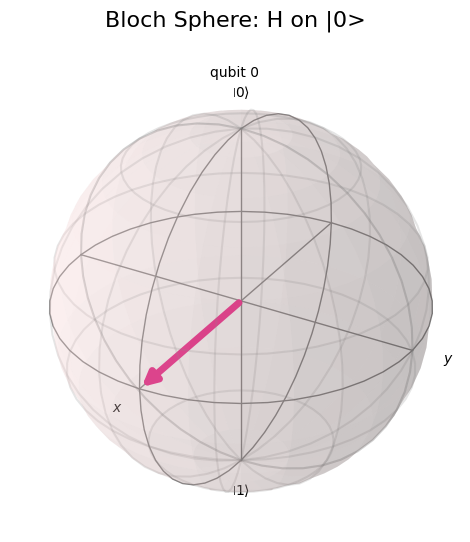

In [5]:
# |0>
hadamard_on_state([1, 0], "|0>")

After H on |1>: [ 0.70710678+0.j -0.70710678+0.j]


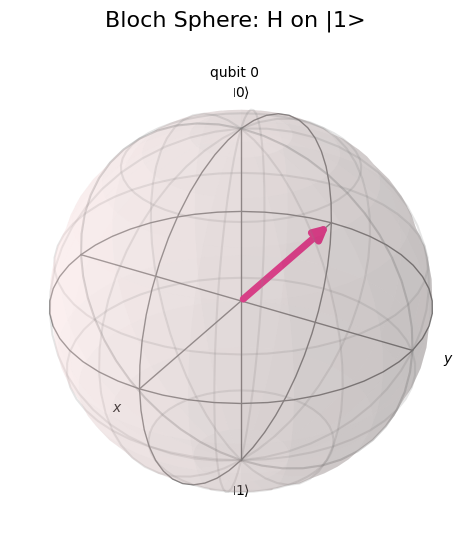

In [6]:
# |1>
hadamard_on_state([0, 1], "|1>")

After H on |+>: [1.+0.j 0.+0.j]


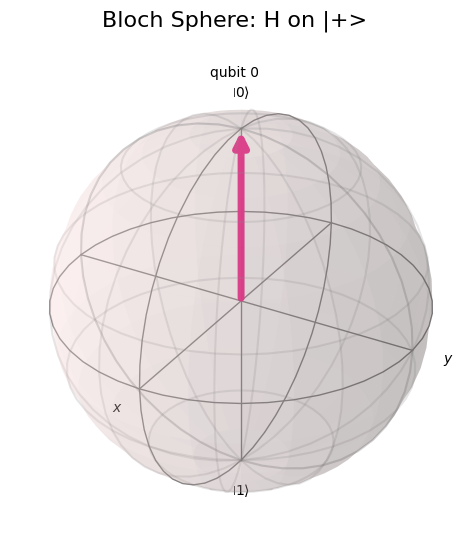

In [7]:
# |+> = (|0> + |1>)/√2
hadamard_on_state([1/np.sqrt(2), 1/np.sqrt(2)], "|+>")


After H on |->: [0.+0.j 1.+0.j]


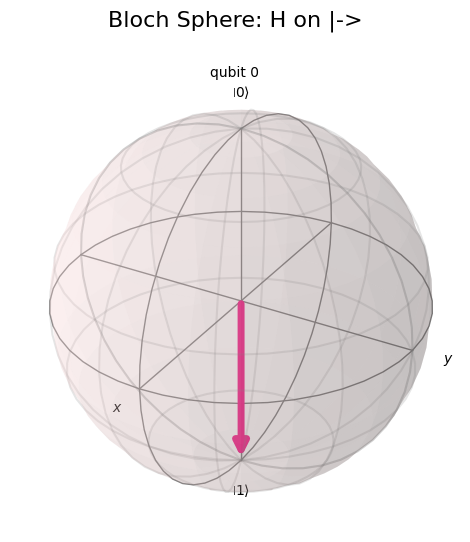

In [8]:
# |-> = (|0> - |1>)/√2
hadamard_on_state([1/np.sqrt(2), -1/np.sqrt(2)], "|->")

In [10]:
#Task 2 — Create a 3-qubit system with H⊗H⊗H and analyze measurement probabilities
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city



In [11]:
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

In [12]:
# Statevector before measurement
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)
print("Statevector for H⊗H⊗H on |000>:\n", state3.data)

Statevector for H⊗H⊗H on |000>:
 [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


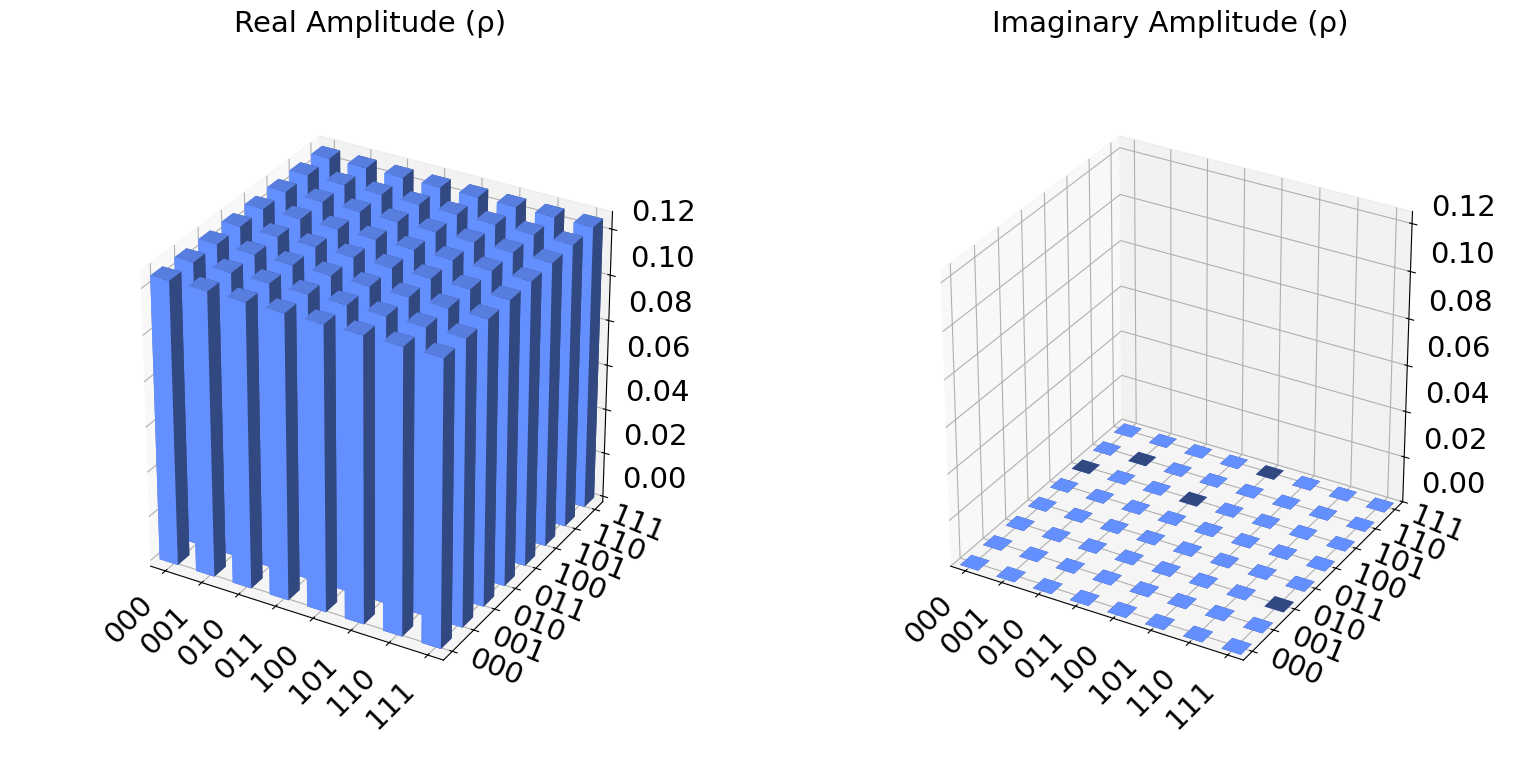

In [13]:
display(plot_state_city(state3))

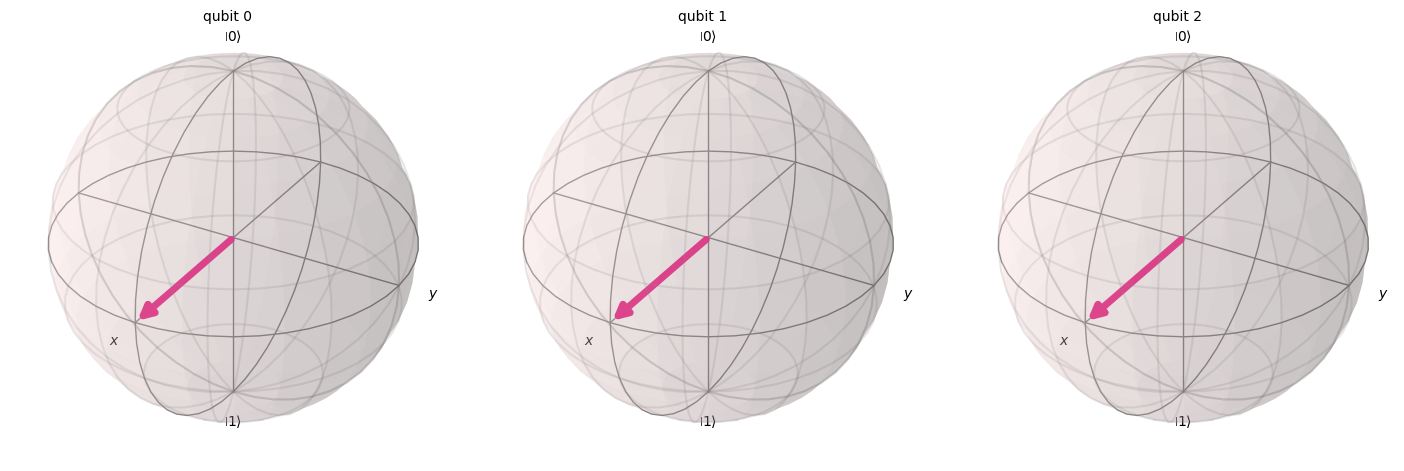

In [14]:
display(plot_bloch_multivector(state3))

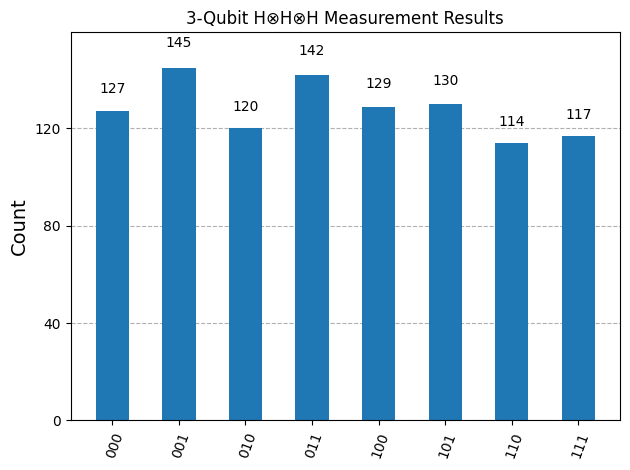

Expected: All 8 states equally likely (1/8 each).


In [15]:
# Simulation
sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="3-Qubit H⊗H⊗H Measurement Results"))
print("Expected: All 8 states equally likely (1/8 each).")

In [16]:
#Task 3 — Apply H + CX + CX on 3 qubits and analyze correlations
qc_ent3 = QuantumCircuit(3, 3)
qc_ent3.h(0)
qc_ent3.cx(0, 1)
qc_ent3.cx(0, 2)
qc_ent3.measure([0, 1, 2], [0, 1, 2])

In [17]:
# Statevector before measurement
qc_ent3_state = QuantumCircuit(3)
qc_ent3_state.h(0)
qc_ent3_state.cx(0, 1)
qc_ent3_state.cx(0, 2)
state_ent3 = Statevector.from_instruction(qc_ent3_state)
print("3-Qubit GHZ Statevector (|000> + |111>)/√2:\n", state_ent3.data)

3-Qubit GHZ Statevector (|000> + |111>)/√2:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


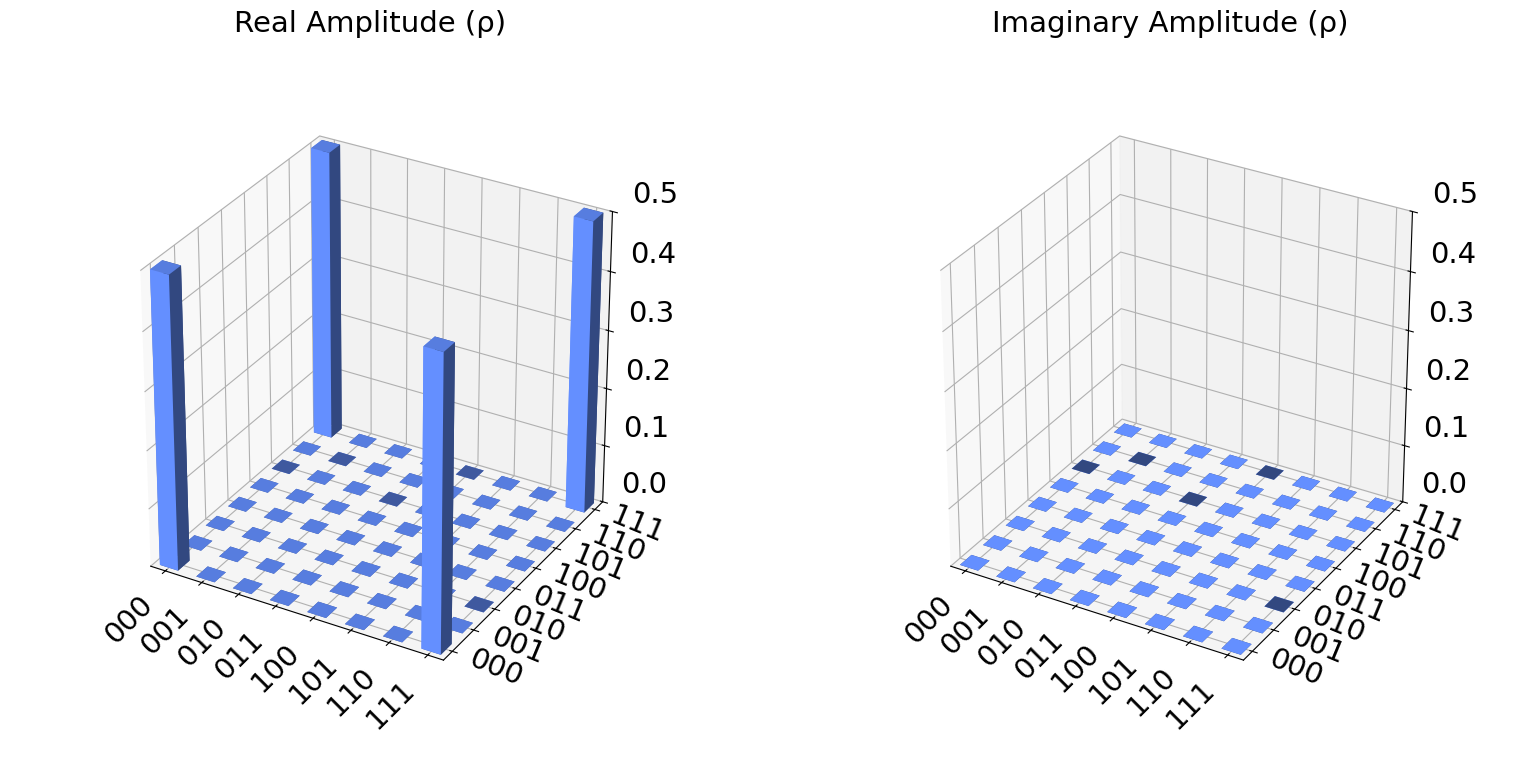

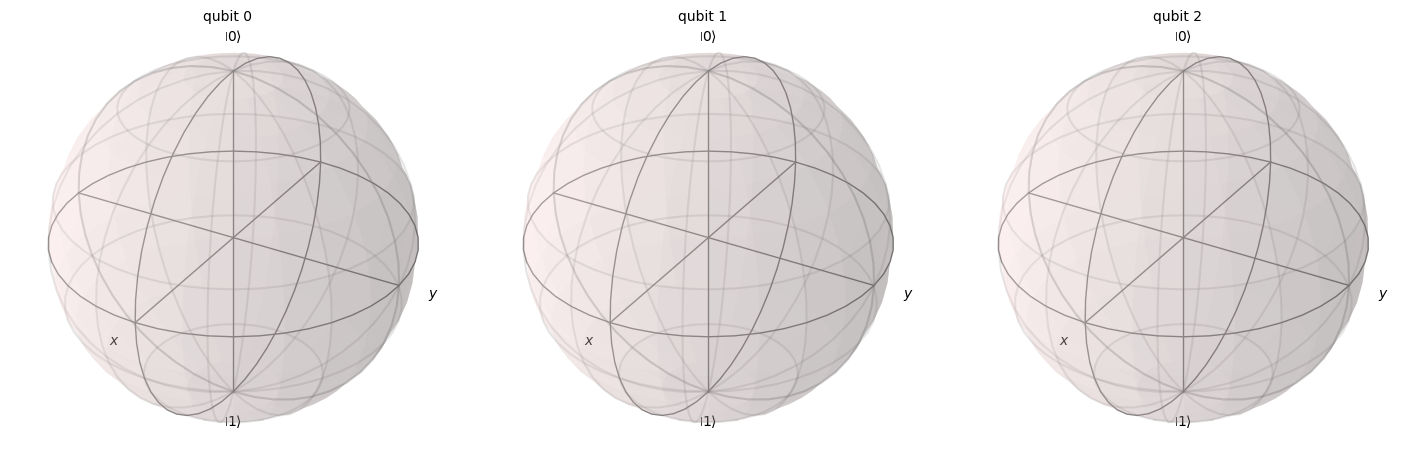

In [20]:
display(plot_state_city(state_ent3))
display(plot_bloch_multivector(state_ent3))


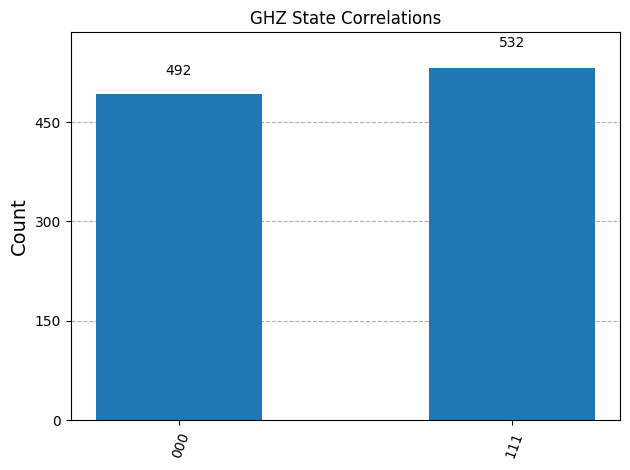

Expected: Only |000> and |111> appear (50% each).


In [21]:
# Simulation
sim = AerSimulator()
qc_ent3_t = transpile(qc_ent3, sim)
result_ent3 = sim.run(qc_ent3_t, shots=1024).result()
counts_ent3 = result_ent3.get_counts()
display(plot_histogram(counts_ent3, title="GHZ State Correlations"))
print("Expected: Only |000> and |111> appear (50% each).")


In [22]:
#Task 4 — Apply H twice on |1> and verify the original state


qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)  # Start in |1>
qc_h2.h(0)
qc_h2.h(0)


In [23]:
state_h2 = Statevector.from_instruction(qc_h2)
print("Statevector after applying H twice on |1>:", state_h2.data)

Statevector after applying H twice on |1>: [0.+0.j 1.+0.j]


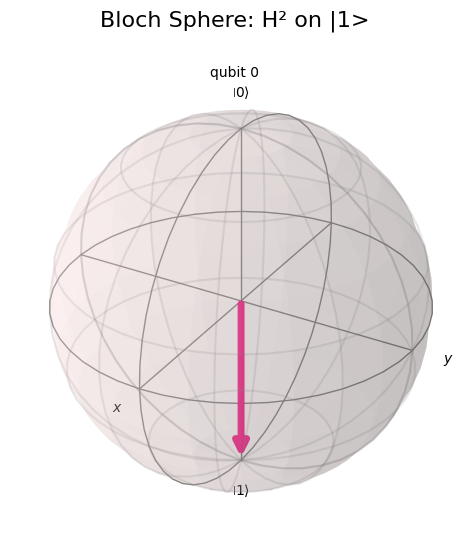

Expected: |1> (Hadamard is its own inverse).


In [24]:
display(plot_bloch_multivector(state_h2, title="Bloch Sphere: H² on |1>"))
print("Expected: |1> (Hadamard is its own inverse).")

In [25]:
#Task 5 — Observe Bloch sphere rotations for H gate

# Show rotation effect on Bloch sphere
states = {
    "|0>": [1, 0],
    "H|0> = |+>": [1/np.sqrt(2), 1/np.sqrt(2)],
    "|1>": [0, 1],
    "H|1> = |->": [1/np.sqrt(2), -1/np.sqrt(2)],
}


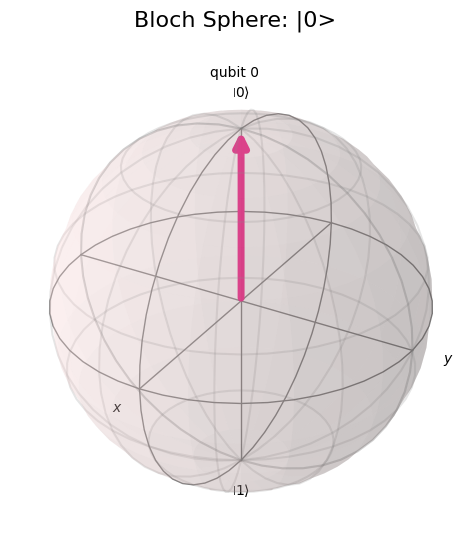

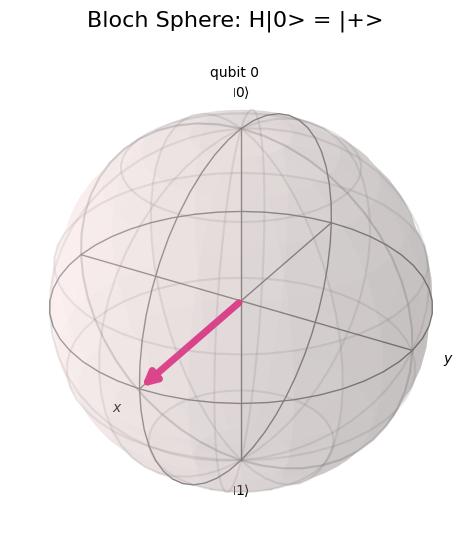

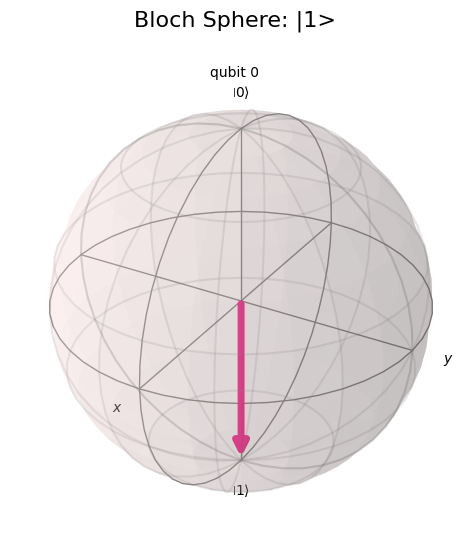

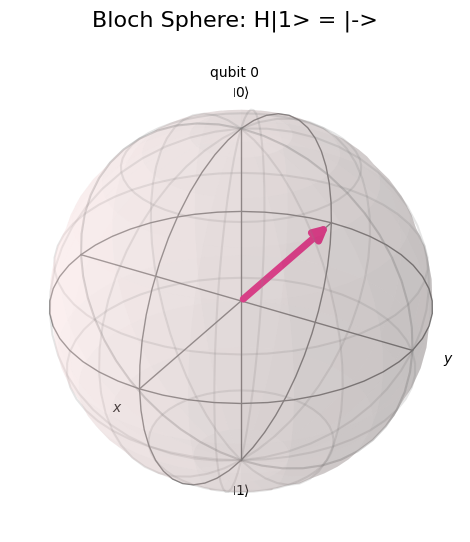

In [26]:
for label, vector in states.items():
    qc = QuantumCircuit(1)
    qc.initialize(vector, 0)
    sv = Statevector.from_instruction(qc)
    display(plot_bloch_multivector(sv, title=f"Bloch Sphere: {label}"))